# ANALISI DELLE PRECIPITAZIONI MONDIALI

##### In questo lavoro si cercheranno di analizzare le precipitazioni mondiali, studiandone l'andamento alla ricerca di risultati significativi

Si importano anzitutto le librerie necessarie per il lavoro

In [1]:
#import module
import tarfile
import os


import pickle
import numpy as np
import pandas as pd
import geopandas as gpd

import datetime as dtm
from tqdm import tqdm
from datetime import datetime

import cartopy.crs as ccrs

# plotting
import seaborn as sns 

import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

import warnings
import scipy
from scipy import stats
warnings.filterwarnings('ignore')  #warning nei caricamenti


## 1. Importazione dei Dati

Si apre ora la connessione per l'importazione dei file utili all'analisi

In [2]:
#declare filename
filename = "C:/Users/matte/Desktop/Lab in Environment/Prog_Env/Global2011P.tar.gz"
 
#open file in write mode
file_obj = tarfile.open(filename,"r")
 
#extract all files
file = file_obj.extractall("extracted_tar")
 
#close file
file_obj.close()

In [2]:
flist = [os.path.join(path, name) for path, subdirs, files in os.walk("C:/Users/matte/Desktop/Prog_Env/extract_tar") for name in files]
for i in range(0,5):
  print (flist[i])
    
print ('\n',flist[0:5])
nst=len(flist)

with open(flist[1]) as f: data = f.readlines()
nst_2=len(data)


print ("\n > Numero totale di anni di rilevazioni= ",nst)
print ("\n > Numero totale di stazioni= ",nst_2)

C:/Users/matte/Desktop/Prog_Env/extract_tar\precip.1900
C:/Users/matte/Desktop/Prog_Env/extract_tar\precip.1901
C:/Users/matte/Desktop/Prog_Env/extract_tar\precip.1902
C:/Users/matte/Desktop/Prog_Env/extract_tar\precip.1903
C:/Users/matte/Desktop/Prog_Env/extract_tar\precip.1904

 ['C:/Users/matte/Desktop/Prog_Env/extract_tar\\precip.1900', 'C:/Users/matte/Desktop/Prog_Env/extract_tar\\precip.1901', 'C:/Users/matte/Desktop/Prog_Env/extract_tar\\precip.1902', 'C:/Users/matte/Desktop/Prog_Env/extract_tar\\precip.1903', 'C:/Users/matte/Desktop/Prog_Env/extract_tar\\precip.1904']

 > Numero totale di anni di rilevazioni=  111

 > Numero totale di stazioni=  85794


Si caricano i dati su Pyhton visualizzando il numero di anni di osservazioni disponibili e il numero di geopunti in cui è presente una rilevazone. I dati a disposizione sono le temperature medie mensili.

Numero totale di anni di rilevazioni=  111

Numero totale di stazioni=  85794

In [13]:
metadata0 = pd.DataFrame(columns=['yr','lon',"lat",'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct',"Nov","Dec"],index= name)

Si crea ora un ciclo che trasforma i file in formati utili per la loro lettura

In [17]:
a=0

from tqdm import tqdm
for si in tqdm(range(0,nst)):
    
    filein=flist[si] #apro il file contrassegnato con il primo anno
    with open(filein) as f: data = f.readlines()
    
    #Estraggo years 
    m_case= "C:/Users/matte/Desktop/Prog_Env/extract_tar\\precip."
    yr=filein[len(m_case):]

    #Aggiungo al dataset
    
 
    for i in range(0,len(data)-1): #Nota che sono 85794 righe che vanno ogni volta studiate e aggiunte
        line=data[i]
        value=line.split()
        metadata0.iloc[a+i,0] = yr
        metadata0.iloc[a+i,1:15] = value[0:14]
    
    a=a+85793
        
   



100%|████████████████████████████████████████████████████████████████████████████| 111/111 [11:18:48<00:00, 366.93s/it]


Salviamo il file per non ripetere il procedimento ogni volta (è lungo)

In [ ]:
#metadata0.to_pickle("precipitazioni.pkl")

In [2]:
wp=pd.read_pickle("precipitazioni.pkl")

In [ ]:
wp.head()

Conversione dei type in numerico

In [3]:
wp["Jan"]=wp["Jan"].astype(str).astype(float)
wp["Feb"]=wp["Feb"].astype(str).astype(float)
wp["Mar"]=wp["Mar"].astype(str).astype(float)
wp["Apr"]=wp["Apr"].astype(str).astype(float)
wp["May"]=wp["May"].astype(str).astype(float)
wp["Jun"]=wp["Jun"].astype(str).astype(float)
wp["Jul"]=wp["Jul"].astype(str).astype(float)
wp["Aug"]=wp["Aug"].astype(str).astype(float)
wp["Sep"]=wp["Sep"].astype(str).astype(float)
wp["Oct"]=wp["Oct"].astype(str).astype(float)
wp["Nov"]=wp["Nov"].astype(str).astype(float)
wp["Dec"]=wp["Dec"].astype(str).astype(float)
wp["lon"]=wp["lon"].astype(str).astype(float)
wp["lat"]=wp["lat"].astype(str).astype(float)
wp["yr"]=wp["yr"].astype(str).astype(float)

#wp.to_pickle("precip_conv.pkl")   --> salvo il file per non ripetere operazione

Upload del nuovo file convertito

In [60]:
wp=pd.read_pickle("precip_conv.pkl")
wp["yr"]=pd.to_datetime(wp['yr'], format='%Y')
wp["yr"]=pd.DatetimeIndex(wp['yr']).year

Creiamo un raster per la visualizzazione di un mese particolare di riferimento

In [66]:
##Creazione Raster

d=wp[wp["yr"]==2000]

d=d[["lon","lat","Dec"]]
#d=d.set_index("lat")
d=d[d.isnull()==False]

raster_data=d.pivot(index='lat', columns='lon')['Dec']
lons = raster_data.columns
lats = raster_data.index

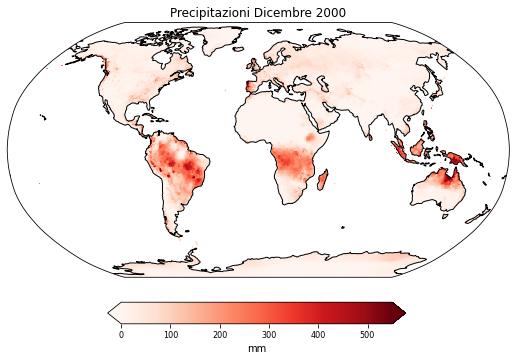

In [68]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import pandas as pd

lons = raster_data.columns
lats = raster_data.index

# Set a global map with chosen projection and plot the raster data

# Note on pcolormesh
# pcolormesh fills the grid cells / pixels identified by either grid edges or grid centroids
# Be careful of the way your raster data is organized

# https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html


fig = plt.figure(figsize=(9,6))  # x,y(inches)

ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.set_title('Precipitazioni Dicembre 2000')

mm = ax.pcolormesh(lons, lats, raster_data, shading='auto', \
                   transform=ccrs.PlateCarree(),cmap="Reds",vmin=0,vmax=550 )

# more color palettes here:
#   https://matplotlib.org/3.1.3/tutorials/colors/colormaps.html

ax.coastlines()

#- add colorbar
cbar_ax = fig.add_axes([0.28, 0.10, 0.46, 0.05]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label('mm') #($\mu g$ $m^{-3}$)
cbar.ax.tick_params(labelsize=8)

plt.show()
plt.close()

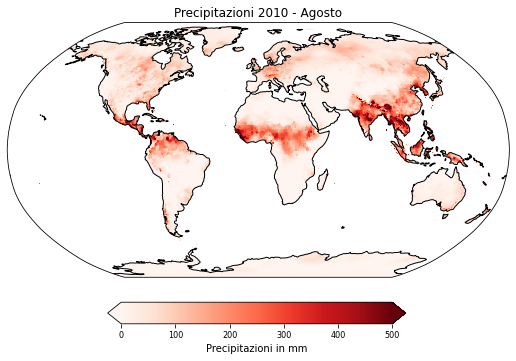

In [81]:
##Creazione Raster

d=wp[wp["yr"]==2010]
#d=d[d["Emisphere"]=="Northern"]
d=d[["lon","lat","Aug"]]
#d=d.set_index("lat")
d=d[d.isnull()==False]

raster_data=d.pivot(index='lat', columns='lon')['Aug']
lons = raster_data.columns
lats = raster_data.index


lons = raster_data.columns
lats = raster_data.index


fig = plt.figure(figsize=(9,6))  # x,y(inches)

ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.set_title('Precipitazioni 2010 - Agosto')

mm = ax.pcolormesh(lons, lats, raster_data, shading='auto', \
                   transform=ccrs.PlateCarree(),cmap="Reds" , vmin=0,vmax=500)

ax.coastlines()

#- add colorbar
cbar_ax = fig.add_axes([0.28, 0.10, 0.46, 0.05]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label('Precipitazioni in mm') #($\mu g$ $m^{-3}$)
cbar.ax.tick_params(labelsize=8)

plt.show()
plt.close()

Si noti come in molti paesi la quantità di precipitazioni risulti maggiore rispetto al confronto con il mese di dicembre!

## 2. Analisi dei dati per l'estrapolazione di informazioni

Si cerca tramite un analisi banale l'andamento delle precipitazioni annuali

In [69]:
anni=wp.groupby("yr").mean()
anni=anni.reset_index()
anni.head()

,yr,lon,lat,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1900,18.43466,1.061168,49.410014,44.250737,40.833242,43.013223,38.391542,51.334062,52.823388,54.795736,46.537162,44.136641,42.449534,46.063369
1,1901,18.43466,1.061168,48.814744,38.856438,52.167119,43.043228,39.616217,45.573660,53.119292,53.939503,46.378195,45.480127,38.271634,46.719870
2,1902,18.43466,1.061168,51.589020,41.925100,45.731566,38.297569,40.689880,41.126788,50.956569,53.414549,53.638276,42.078302,40.139369,41.465875
3,1903,18.43466,1.061168,41.556851,49.198157,50.624910,43.246415,44.996931,52.944550,52.442885,60.539327,46.106378,45.941642,37.357417,42.149394
4,1904,18.43466,1.061168,50.229034,40.212917,47.987639,39.630851,44.742837,45.568462,52.217542,51.359690,50.199853,46.667938,44.587991,40.162462


In [71]:
anni=anni.drop("lon",1)
anni=anni.drop("lat",1)

Bisogna ora convertire le colonne in righe per unire gli anni ai mesi

In [72]:
df1 = pd.melt(anni, id_vars=['yr'], var_name=['Month'])
df1=df1.reset_index()
df1.head()

,index,yr,Month,value
0,0,1900,Jan,49.410014
1,1,1901,Jan,48.814744
2,2,1902,Jan,51.589020
3,3,1903,Jan,41.556851
4,4,1904,Jan,50.229034


In [73]:
df1['Date'] = pd.to_datetime(df1['yr'].astype(str) + '-' + df1['Month'].astype(str))
df1 = df1.sort_values(by=['yr']).drop(columns=['yr','Month']).reset_index(drop=['index'])
df1.head()

,index,value,Date
0,0,49.410014,1900-01-01
1,555,51.334062,1900-06-01
2,333,43.013223,1900-04-01
3,666,52.823388,1900-07-01
4,222,40.833242,1900-03-01


A questo punto si puo fare un grafico della serie storica con andamento mensile dal 1900 al 2010

Text(0, 0.5, 'Valori Medi Mensili')

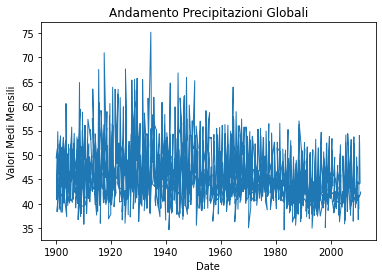

In [74]:
#plot time series
plt.plot(df1.Date, df1.value, linewidth=1)

#add title and axis labels
plt.title('Andamento Precipitazioni Globali')
plt.xlabel('Date')
plt.ylabel('Valori Medi Mensili')

Chiaramente evidenziare da questo grafico un andamento preciso è molto complicato. SI procede quindi con un raggruppamento annuale

Text(0, 0.5, 'Valori Medi Annuali')

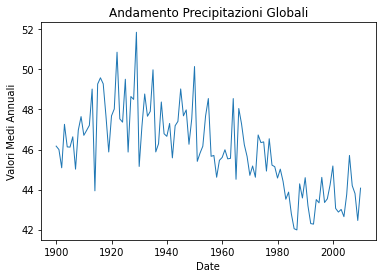

In [76]:
df1 = pd.melt(anni, id_vars=['yr'], var_name=['Month'])
df1 = df1.groupby("yr").mean()
df1=df1.reset_index()
df1.head()

df1['Date'] = pd.to_datetime(df1['yr'].astype(str))
df1 = df1.sort_values(by=['Date']).drop(columns=['yr']).reset_index(drop=['index'])
df1.head()

#plot time series
plt.plot(df1.Date, df1.value, linewidth=1)

#add title and axis labels
plt.title('Andamento Precipitazioni Globali')
plt.xlabel('Date')
plt.ylabel('Valori Medi Annuali')

## 3. Ricerca andamento stagionale

Si ricerca ora un andamento delle precipitazioni ma stagionale 

In [78]:
wp["Emisphere"] = np.where(wp["lat"] > 0, "Northern","Southern") #suddivisione emisferi

In [79]:
anni=wp.groupby(["yr","Emisphere"]).mean()
anni=anni.reset_index()
anni = anni.drop('lon', 1)
anni = anni.drop('lat', 1)
anni.head()

,yr,Emisphere,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1900,Northern,28.245402,29.934796,34.636959,41.650778,44.393654,65.233063,78.008826,75.109654,64.474120,49.495785,37.350433,31.492340
1,1900,Southern,78.422967,63.875370,49.327253,44.880894,30.163705,32.280982,18.298591,26.948935,21.948752,36.790198,49.439503,66.037682
2,1901,Northern,29.012464,24.514899,32.653125,37.713186,46.637677,63.238923,77.017873,81.032020,55.764222,47.751244,36.840396,33.347912
3,1901,Southern,75.960179,58.516160,78.917365,50.349778,29.991033,21.357698,20.358549,16.800437,33.511606,42.366825,40.233609,65.050468
4,1902,Northern,28.660208,24.992203,34.740493,36.706217,51.676846,59.506578,77.403387,77.341832,69.955945,49.207783,36.566671,33.159140


Creazione di una funzione che converte il mese dato l'emisfero nella stagione

In [83]:
def find_season(month, hemisphere):
    if hemisphere == 'Southern':
        season_month_south = {
            12:'Summer', 1:'Summer', 2:'Summer',
            3:'Autumn', 4:'Autumn', 5:'Autumn',
            6:'Winter', 7:'Winter', 8:'Winter',
            9:'Spring', 10:'Spring', 11:'Spring'}
        return season_month_south.get(month)
        
    elif hemisphere == 'Northern':
        season_month_north = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}
        return season_month_north.get(month)
    else:
        print('Invalid selection. Please select a hemisphere and try again')

C'è bisogno dei mesi in numero

In [84]:
df3=pd.melt(anni, id_vars=['yr',"Emisphere"], var_name=['Month'])
df3=df3.reset_index()
df3.head()

,index,yr,Emisphere,Month,value
0,0,1900,Northern,Jan,28.245402
1,1,1900,Southern,Jan,78.422967
2,2,1901,Northern,Jan,29.012464
3,3,1901,Southern,Jan,75.960179
4,4,1902,Northern,Jan,28.660208


In [85]:
v=[]
for i in range(0,len(df3)):
    datetime_object = datetime.strptime(df3["Month"][i], "%b")
    v.append(datetime_object.month)
len(v)

df3["Month"]=v

In [89]:
v=[]
for i in range(0,len(df3)):
    seas = find_season(df3["Month"][i], df3["Emisphere"][i])
    v.append(seas)
len(v)

df3["Season"]=v
df3.head()

,index,yr,Emisphere,Month,value,Season
0,0,1900,Northern,1,28.245402,Winter
1,1,1900,Southern,1,78.422967,Summer
2,2,1901,Northern,1,29.012464,Winter
3,3,1901,Southern,1,75.960179,Summer
4,4,1902,Northern,1,28.660208,Winter


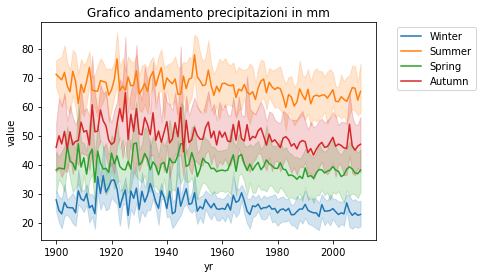

In [90]:
sns.lineplot(data=df3, 
             x='yr', 
             y='value', 
             hue='Season', 
             legend='full')

# add title
plt.title('Grafico andamento precipitazioni in mm')

# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

Che interpretazione possiamo dare al seguente grafico?
Il risultato è molto interessante e al quanto inaspettato. Il realtà bisogna stare attenti, quello di cui si dispone è la quantità di pioggia caduta in media in ogni singolo mese. E' vero che l'inverno costituisce il mese più piovoso in diversi paesi del mondo ma l'estate è spesso tipica per forti acquazzoni e/o cicloni (soprattuto in paesi come il Messico e Mozambico). Tali condizioni portano alla caduta di numerosa quantità di pioggia. 

## 4. Calcolo delle Anomalie (Rispetto ad un periodo di riferimento)

In [8]:
df = wp.drop(["lon","lat"],1)
#df.head()

Fisso il periodo di riferimento

In [19]:
df2=df[df['yr']>=1954]
df2=df2[df2['yr']<=1984]

normals=df2.mean(axis=0)

In [33]:
anomaly = pd.DataFrame(columns=['yr','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct',"Nov","Dec"],index= range(0,len(df)))

Calcolo delle anomalie

In [41]:
for i in tqdm(range(0,len(df))):
    anomaly.iloc[i,1:13] = (df.iloc[i,1:13] - normals[1:13])
    
anomaly["yr"]=df["yr"]
#anomaly.to_pickle("anomalie.pkl")  ----> salvo per risparmiare tempo successivamente
        

100%|████████████████████████████████████████████████████████████████████| 9523023/9523023 [1:55:21<00:00, 1375.94it/s]


Anomalie calcolate per tutto il periodo di riferimento

In [3]:
an=pd.read_pickle("anomalie.pkl")
an["yr"]=pd.to_datetime(an['yr'], format='%Y')
an["yr"]=pd.DatetimeIndex(an['yr']).year
an.head()

,yr,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1900,-42.228958,-35.825221,-43.971578,-36.509208,-37.597139,-30.057552,-35.462362,1.266795,-25.240549,-4.692988,-19.762502,-30.550587
1,1900,-29.728958,-32.425221,-39.871578,-31.709208,-34.797139,-22.957552,-27.662362,16.166795,-8.040549,21.407012,3.137498,-19.850587
2,1900,-28.628958,-31.725221,-39.571578,-32.109208,-35.797139,-20.657552,-26.262362,19.366795,-7.240549,22.707012,3.037498,-20.350587
3,1900,-25.128958,-28.125221,-38.371578,-31.109208,-35.897139,-16.157552,-21.262362,26.066795,-5.840549,25.207012,4.637498,-18.750587
4,1900,-19.628958,-23.425221,-36.571578,-29.609208,-35.897139,-11.557552,-16.962362,31.866795,-5.040549,28.707012,7.537498,-15.450587


Selezione periodo dal 1910 al 1940

In [108]:
an_small= an[an["yr"]>1910]
an_small= an_small[an_small["yr"]<1940]

Costruzione andamento annuale

In [109]:
an_d = pd.melt(an_small, id_vars=['yr'], var_name=['Month'])
an_d=an_d.reset_index()
an_d.head()

an_d['Date'] = pd.to_datetime(an_d['yr'].astype(str) + '-' + an_d['Month'].astype(str))
an_d = an_d.sort_values(by=['yr']).drop(columns=['yr','Month']).reset_index(drop=['index'])
an_d = an_d.drop("index",1)
an_d.head()

,value,Date
0,-34.928958,1911-01-01
1,-1.057552,1911-06-01
2,-2.457552,1911-06-01
3,-3.957552,1911-06-01
4,-5.657552,1911-06-01


In [110]:
uno_ann=an_d.groupby([an_d.Date.dt.year,an_d.Date.dt.month],as_index=False).mean() #raggruppamento annuale e poi mensile
uno_ann.index=uno_ann["Date"]
uno_ann= uno_ann.drop("Date",1)
uno_ann.head()

,value
Date,
1911-01-01 00:00:00.000000000,3.807994
1911-02-01 00:00:00.000000256,-2.244790
1911-03-01 00:00:00.000000000,3.296803
1911-04-01 00:00:00.000000000,3.876968
1911-05-01 00:00:00.000000000,1.646220


Estrapolazione ultimi 30 anni

In [111]:
an_small= an[an["yr"]>1980]
an_small= an_small[an_small["yr"]<2010]

an_d = pd.melt(an_small, id_vars=['yr'], var_name=['Month'])
an_d=an_d.reset_index()
an_d.head()

an_d['Date'] = pd.to_datetime(an_d['yr'].astype(str) + '-' + an_d['Month'].astype(str))
an_d = an_d.sort_values(by=['yr']).drop(columns=['yr','Month']).reset_index(drop=['index'])
an_d = an_d.drop("index",1)
an_d.head()

,value,Date
0,-34.728958,1981-01-01
1,-46.857552,1981-06-01
2,-46.857552,1981-06-01
3,-46.857552,1981-06-01
4,-46.857552,1981-06-01


In [112]:
due_ann=an_d.groupby([an_d.Date.dt.year,an_d.Date.dt.month],as_index=False).mean() #aggruppamento mese e anno
due_ann.index= due_ann["Date"]
due_ann= due_ann.drop("Date",1)
due_ann.head()

,value
Date,
1981-01-01,0.786826
1981-02-01,0.648857
1981-03-01,-1.827634
1981-04-01,-0.891675
1981-05-01,-0.184853


## Costruzione dataset per il test delle differenze

Si procede ora alla costruzuione del dataset raggruppando le medie mensili per ogni anni per andare ad evidenziare un eventuale cambiamento di tendenza

In [119]:
#average the global mean temperature anomaly
df = uno_ann.groupby(uno_ann.index.strftime('%b')).mean()
df2= due_ann.groupby(due_ann.index.strftime('%b')).mean()
last_30_yr_mean=df.mean(axis=1)
first_30_yr_mean=df2.mean(axis=1)

In [120]:
# adjust data structure
last_30_yr_mean_df = pd.Series.to_frame(last_30_yr_mean)
last_30_yr_mean_df['time'] = list(last_30_yr_mean.index)
last_30_yr_mean_df['time']=pd.to_datetime(last_30_yr_mean_df['time'], format="%b")
last_30_yr_mean_df = last_30_yr_mean_df.set_index(['time'])

first_30_yr_mean_df = pd.Series.to_frame(first_30_yr_mean)
first_30_yr_mean_df['time'] = list(first_30_yr_mean.index)
first_30_yr_mean_df['time']=pd.to_datetime(first_30_yr_mean_df['time'], format="%b")
first_30_yr_mean_df = first_30_yr_mean_df.set_index(['time'])

In [122]:
final=last_30_yr_mean_df.merge(first_30_yr_mean_df, on='time')
final.rename(columns={'0_x':'1910-1940_mean','0_y':'1980-2010_mean' },inplace=True)   
final

,1910-1940_mean,1980-2010_mean
time,,
1900-04-01,2.145811,-2.408441
1900-08-01,3.354039,-2.865761
1900-12-01,0.913447,-1.918479
1900-02-01,1.956508,-1.959849
1900-01-01,1.279102,-1.200573
1900-07-01,4.342109,-2.812089
1900-06-01,2.965411,-1.735488
1900-03-01,3.146149,-2.050000
1900-05-01,2.209730,-2.274221


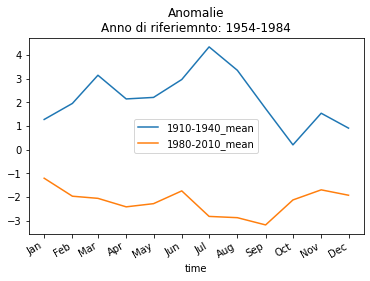

In [124]:
# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

final.plot()
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.title('Anomalie\n'+ 'Anno di riferiemnto: 1954-1984')
plt.show()

### Costruzione del test

In [125]:
print('1910-1940 annual average = '+ str(first_30_yr_mean.mean()))
print('1980-2010 annual average = '+ str(last_30_yr_mean.mean()))

1910-1940 annual average = -2.1836906146401573
1980-2010 annual average = 2.149960375367055


Proviamo un test per verificare che la differenza delle medie sia nulla

In [126]:
scipy.stats.ttest_ind(last_30_yr_mean, first_30_yr_mean)

Ttest_indResult(statistic=11.73500848691467, pvalue=6.09696496245546e-11)

## 5. Andamento temperature vs Andamento precipitazioni

Carichiamo il dataset delle anomalie delle temperature e facciamo un confronto annuale con l'andamento delle temperature

In [127]:
an_d = pd.melt(an, id_vars=['yr'], var_name=['Month'])

In [130]:
val_med=an_d.groupby("yr").mean()

In [132]:
HadCRUT4_anom= pd.read_pickle("C:/Users/matte/Desktop/Lab in Environment/Assignment/data_anomaly.pkl")
HadCRUT4_anom_1901=HadCRUT4_anom.loc['1900-01':'2010-12']
HadCRUT4_anom_1901_y = HadCRUT4_anom_1901.groupby(HadCRUT4_anom_1901.index.strftime('%Y')).mean()

In [134]:
HadCRUT4_anom_1901_y.mean(axis=1)

time
1900    0.174674
1901   -0.196063
1902   -0.426063
1903   -0.493419
1904   -0.575587
          ...   
2006    1.085269
2007    1.162325
2008    0.772027
2009    0.665652
2010    0.679792
Length: 111, dtype: float64

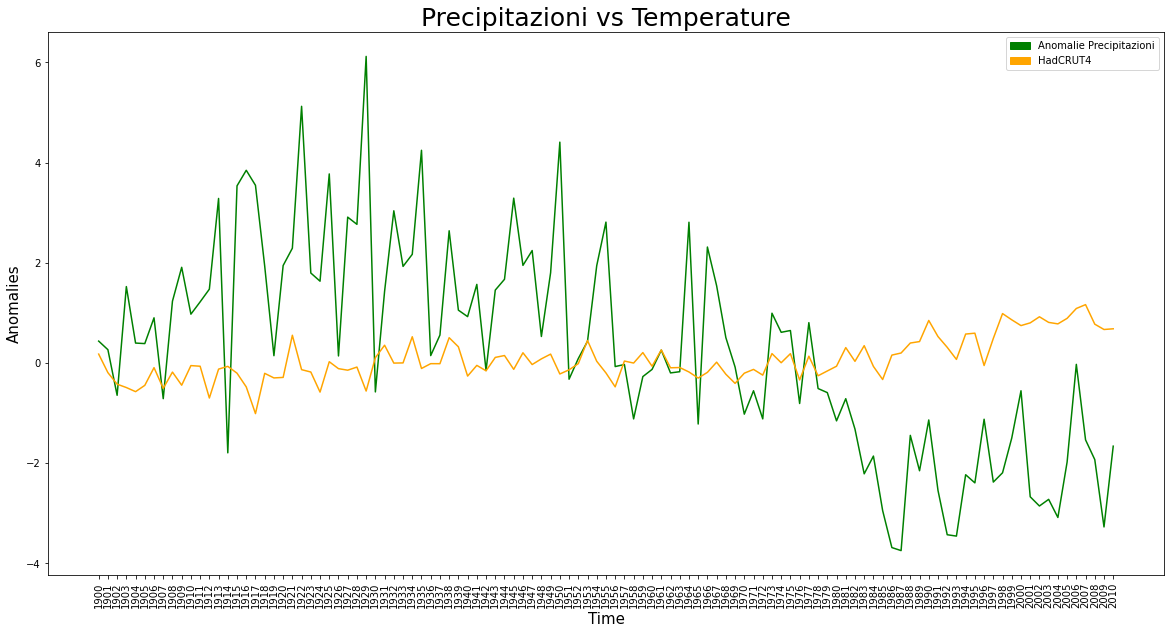

In [140]:
#plot

plt.figure(figsize=(20,10))
plt.xlabel('Time', size=15)
plt.ylabel('Anomalies', size=15)


plt.plot(HadCRUT4_anom_1901_y.index,val_med["value"], color='green') 
plt.plot(HadCRUT4_anom_1901_y.index, HadCRUT4_anom_1901_y.mean(axis=1),  color='orange')

_ = plt.xticks(rotation=90)
plt.title('Precipitazioni vs Temperature', size=25)

#add legend manually
green_patch = mpatches.Patch(color='green', label='Anomalie Precipitazioni')
orange_patch = mpatches.Patch(color='orange', label='HadCRUT4')
#blue_patch = mpatches.Patch(color='blue', label='IC-Ensemble')
plt.legend(handles=[green_patch, orange_patch])


plt.show()

E' interessante notare come ad un cambio di livello della serie storica dell'andamento delle temperature, in particolare uno shift verso il basso (indice di una diminuzione delle precipitazione) sia corrisposto un cambio di trend postivio per le temperature medie. Questo intorno all'anno 1980. In sostanza un alzamento della temperatura media globale sembrerebbe spiegare una diminuzione significativa delle precipitazioni.